# Bin-Pakcaging (week 4)

Binary optimization problem definition: </br>
Allocation of N objects to M bins, whoes number shall be minimized </br>



In [4]:
import numpy as np
import random
random.seed('0123456')

numObjects = 40
numBins = numObjects  # at most one bin per object
K = 1
a = np.zeros(numObjects)
for i in range(numObjects):
    a[i] = random.random()

In [5]:
import gurobipy as gp
from gurobipy import GRB

model = gp.Model() # create Model 
model.Params.LogToConsole = 0

x = {} # Usage of bin i (binary)
for i in range(numBins):
    for j in range(numObjects):
        x[i, j] = model.addVar(vtype=GRB.BINARY)

y = {} # Usage of object j to container i (binary)
for i in range(numBins):
    y[i] = model.addVar(vtype=GRB.BINARY)

for i in range(numBins):
    model.addConstr(
        gp.quicksum(x[i, j]*a[j] for j in range(numObjects)) <= y[i]*K
    )
for j in range(numObjects):
    model.addConstr(
        gp.quicksum(x[i, j] for i in range(numBins)) == 1
    )

obj = gp.quicksum(y[i]*(1+i/numBins) for i in range(numBins)) # Minimize the number of required bins

model.setObjective(obj, GRB.MINIMIZE)
model.optimize() # solve linear Problem

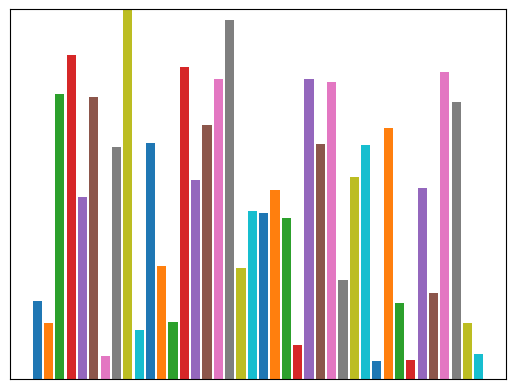

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
x_ = {}
for j in range(numObjects):
    x_[j] = np.zeros(numBins)
    x_[j][j] = 1
for j in range(numObjects):
    plt.bar(range(numBins), x_[j]*a[j], bottom=sum([x_[i]*a[i] for i in range(j)]))
plt.xticks([]),plt.yticks([])
plt.show()

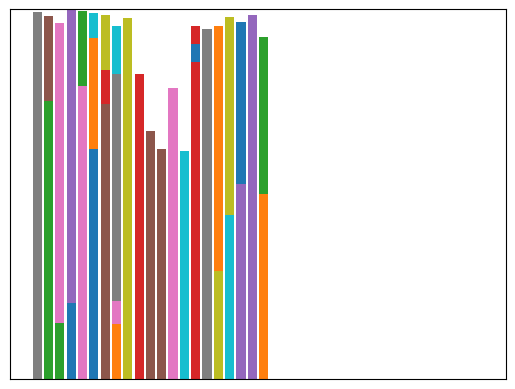

In [7]:
plt.clf()
x_ = {}
for j in range(numObjects):
    x_[j] = np.array([x[i, j].x for i in range(numBins)])

for j in range(numObjects):
    plt.bar(range(numBins), x_[j]*a[j], bottom=sum([x_[i]*a[i] for i in range(j)]))
plt.xticks([]),plt.yticks([])
plt.show()